In [1]:
def sort_by_target(mnist):
    # 创建一个列表，包含训练集中目标标签和对应的索引，然后按目标标签排序
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    
    # 创建一个列表，包含测试集中目标标签和对应的索引，然后按目标标签排序
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    
    # 根据排序后的索引重新排序训练集的数据和目标标签
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    
    # 根据排序后的索引重新排序测试集的数据和目标标签
    # 注意这里使用了reorder_test索引加上60000，因为测试集的索引是从60000开始的
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [5]:
import numpy as np

try:
    # 尝试从scikit-learn的fetch_openml函数导入MNIST数据集
    from sklearn.datasets import fetch_openml
    # 使用fetch_openml()函数加载MNIST数据集，指定版本为1，启用缓存，不以数据框形式返回
    mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
    
    # 将目标(target)列的数据类型转换为np.int8，因为fetch_openml()返回的目标是字符串类型
    mnist.target = mnist.target.astype(np.int8)
    
    # 调用自定义的sort_by_target函数对数据集进行排序
    sort_by_target(mnist) # fetch_openml()返回的数据集是未排序的
except ImportError:
    # 如果fetch_openml无法导入（例如scikit-learn版本不支持），则尝试使用fetch_mldata函数
    from sklearn.datasets import fetch_mldata
    # 使用fetch_mldata()函数加载MNIST数据集
    mnist = fetch_mldata('MNIST original')
    
# 这里的mnist是一个字典，包含"data"和"target"两个键，分别对应数据集和目标
mnist["data"], mnist["target"]

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [6]:
# 获取mnist数据集中图像数据的形状
# mnist.data是一个NumPy数组，shape属性返回一个元组，表示数组的维度大小
# 对于MNIST数据集，mnist.data的形状通常是(60000, 784)或(60000,)，具体取决于数据是否被展平
mnist.data.shape

(70000, 784)

In [8]:
# 从MNIST数据集中分离特征和标签
# mnist["data"]是所有图像的像素值，mnist["target"]是对应的标签
X, y = mnist["data"], mnist["target"]

# 打印特征数据的形状
# X.shape将返回一个元组，表示X的维度大小，通常对于MNIST数据集，形状是(60000, 784)
# 其中60000是样本数量，784是每个样本的像素值数量（28x28像素的图像被展平）
print(X.shape)

# 打印标签数据的形状
# y.shape将返回一个元组，表示y的维度大小
# 对于MNIST数据集，如果标签是一维数组，形状是(60000,)
# 如果标签是二维的（例如，one-hot编码），形状可能是(60000, 10)
print(y.shape)

(70000, 784)
(70000,)


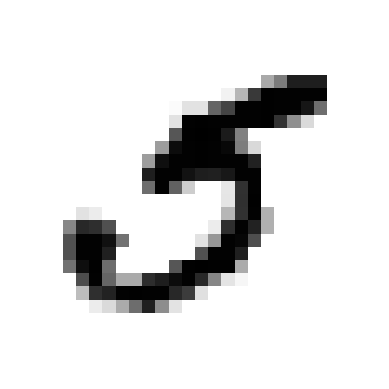

In [13]:
# 导入matplotlib的pyplot模块，这是用于绘图的主要模块
# 给它一个别名plt，这样我们就可以使用plt来访问这个模块的所有函数
import matplotlib.pyplot as plt

# 导入必要的其他库，例如numpy，如果还没有导入的话
import numpy as np

# 假设X是已经加载的MNIST数据集中的特征矩阵
# some_digit是X中的一个784维向量，表示一张28x28像素的图像
some_digit = X[36000]

# 使用reshape方法将784维向量重新排列成28x28的二维数组
some_digit_image = some_digit.reshape(28, 28)

# 使用matplotlib的imshow函数显示图像
# cmap设置为binary，这通常用于显示黑白图像
# interpolation设置为"nearest"，表示使用最近邻插值方法
plt.imshow(some_digit_image, cmap=plt.cm.binary, interpolation="nearest")

# 关闭图像的坐标轴显示
plt.axis("off")

# 保存图像，函数savefig用于保存当前的绘图
# 需要确保save_fig函数已经被定义，并且能够正确保存图像
plt.savefig("images/some_digit_plot.png",bbox_inches='tight')

# 显示图像
plt.show()

In [14]:
# 访问MNIST数据集中第36000个样本的标签
# y是一个数组，包含了数据集中所有样本的标签
# 假设y是一个一维数组，索引36000将返回该索引处的标签值
y[36000]

np.int8(5)

In [16]:
def plot_digit(data):
    # 将输入数据reshape成28x28的二维数组，以恢复为图像的原始尺寸
    # 这个操作假设输入数据是一个784维的一维数组
    image = data.reshape(28, 28)
    
    # 使用matplotlib的imshow函数显示图像
    # cmap设置为binary，这通常用于显示黑白图像
    # interpolation设置为"nearest"，表示使用最近邻插值方法
    plt.imshow(image, cmap=plt.cm.binary, interpolation="nearest")
    
    # 关闭图像的坐标轴显示，使图像看起来更清晰
    plt.axis("off")

In [17]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    # 定义图像的尺寸，MNIST图像是28x28像素
    size = 28
    
    # 限制每行显示的图像数量，不超过实例的数量
    images_per_row = min(len(instances), images_per_row)
    
    # 将每个实例重塑成28x28的二维数组
    images = [instance.reshape(size, size) for instance in instances]
    
    # 计算需要显示的行数
    n_rows = (len(instances) - 1) // images_per_row + 1
    
    # 初始化一个列表，用于存储每一行的图像
    row_images = []
    
    # 计算需要添加的空白图像数量，以填满最后一行
    n_empty = n_rows * images_per_row - len(instances)
    
    # 添加空白图像以确保最后一行完整
    images.append(np.zeros((size, size * n_empty)))
    
    # 遍历每一行，将图像按行拼接起来
    for row in range(n_rows):
        # 获取当前行的图像列表
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        # 将当前行的图像水平拼接
        row_images.append(np.concatenate(rimages, axis=1))
    
    # 垂直拼接所有行的图像，形成一个大的图像
    image = np.concatenate(row_images, axis=0)
    
    # 使用matplotlib的imshow函数显示拼接后的图像
    plt.imshow(image, cmap=plt.cm.binary, **options)
    
    # 关闭图像的坐标轴显示
    plt.axis("off")

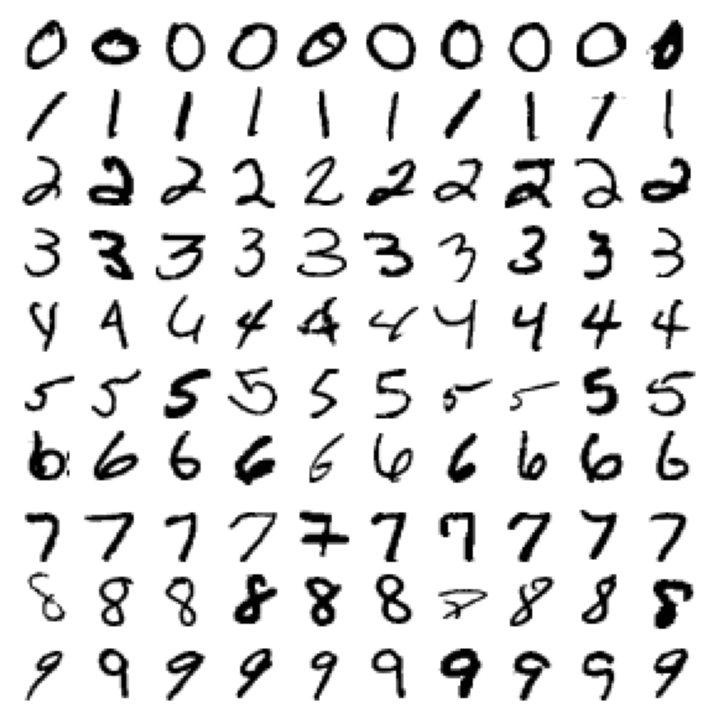

In [19]:
# 设置matplotlib图形的尺寸为9x9英寸
plt.figure(figsize=(9, 9))

# 使用numpy的r_函数来创建一个新的数组，这个数组包含从X中每隔一定步长选取的图像
# 这里选取了三组图像，每组图像的起始索引和步长都不同
# X是MNIST数据集的特征矩阵，其中包含了所有图像的像素值
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]

# 调用plot_digits函数来绘制这些图像
# 每行显示10个图像
plot_digits(example_images, images_per_row=10)

# 假设 savefig 是一个已经定义的函数，用于保存当前的图形
# 这里需要确保save_fig函数能够正确执行，并且有保存图形的权限
plt.savefig("images/more_digits_plot.png",bbox_inches='tight')

# 显示图形
plt.show()

In [20]:
# 将特征数据X分割为训练集和测试集
# X_train包含前60000个样本的特征数据
X_train = X[:60000]

# X_test包含后10000个样本的特征数据（假设X的总样本数为70000）
X_test = X[60000:]

# 将标签数据y分割为训练集和测试集
# y_train包含前60000个样本的标签
y_train = y[:60000]

# y_test包含后10000个样本的标签
y_test = y[60000:]

In [21]:
# 导入NumPy库，并给它一个常用的别名np
import numpy as np

# 使用np.random.permutation生成一个从0到59999的随机排列
# 这个排列将用于随机打乱训练数据集的索引
shuffle_index = np.random.permutation(60000)

# 使用上面生成的随机索引来打乱X_train和y_train
# 这样，每个特征数据X_train[i]和对应的标签y_train[i]都会根据shuffle_index进行重新排序
# 这有助于防止模型训练过程中的过拟合，并确保训练数据的多样性
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [22]:
# 使用比较操作符'=='和训练集标签y_train创建一个布尔数组y_train_5
# 这个数组将包含与y_train中每个元素对应的布尔值，如果标签等于5，则为True，否则为False
y_train_5 = (y_train == 5)

# 使用比较操作符'=='和测试集标签y_test创建一个布尔数组y_test_5
# 这个数组将包含与y_test中每个元素对应的布尔值，如果标签等于5，则为True，否则为False
y_test_5 = (y_test == 5)

In [25]:
from sklearn.linear_model import SGDClassifier
import numpy as np

# 创建SGDClassifier实例，设置一些参数
# max_iter=5：设置迭代次数为5
# tol=0：设置容忍度为0，这意味着训练将不会因收敛而提前停止
# random_state=42：设置随机状态为42，以确保结果的可重复性
sgd_clf = SGDClassifier(max_iter=5, tol=0, random_state=42)

# 使用fit方法训练分类器
# X_train是训练数据的特征集
# y_train_5是一个布尔数组，表示训练数据的标签是否为5
# 这里只训练模型以识别数字5，忽略了其他标签的样本
sgd_clf.fit(X_train, y_train_5)

D:\Program Files\Anaconda3\envs\MachineL_SKLearn_TensorF_Project\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=5, random_state=42, tol=0)

In [27]:
# 使用训练好的SGDClassifier模型sgd_clf对单个图像some_digit进行预测
# some_digit是一个784维的NumPy数组，表示一个已经预处理和标准化的手写数字图像
# 这个数组需要与训练数据具有相同的格式和特征
# predict方法将返回模型预测的标签
prediction = sgd_clf.predict([some_digit])
prediction

array([ True])

In [28]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# 创建StratifiedKFold对象，用于分层K折交叉验证
# n_splits=3：设置折数为3
# random_state=42：设置随机状态为42，确保结果的可重复性
# shuffle=True：在分割前对数据进行打乱
skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

# 遍历StratifiedKFold生成的每个训练集和测试集索引
for train_index, test_index in skfolds.split(X_train, y_train_5):
    # 使用clone函数复制原始的SGDClassifier模型
    clone_clf = clone(sgd_clf)

    # 根据生成的索引获取当前折的训练集和测试集数据
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]  # 注意这里y_train_5已经是一个布尔数组
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]     # 同上

    # 使用当前折的训练集数据训练复制的模型
    clone_clf.fit(X_train_folds, y_train_folds)

    # 使用训练好的模型对当前折的测试集进行预测
    y_pred = clone_clf.predict(X_test_fold)

    # 计算预测正确的数量
    n_correct = sum(y_pred == y_test_fold)

    # 打印当前折的准确率，即预测正确的样本数占总样本的比例
    print(n_correct / len(y_pred))

D:\Program Files\Anaconda3\envs\MachineL_SKLearn_TensorF_Project\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.9673


D:\Program Files\Anaconda3\envs\MachineL_SKLearn_TensorF_Project\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.96295
0.96085


D:\Program Files\Anaconda3\envs\MachineL_SKLearn_TensorF_Project\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [30]:
from sklearn.model_selection import cross_val_score

# 使用cross_val_score函数执行交叉验证
# sgd_clf是之前创建并配置好的SGDClassifier模型
# X_train是训练数据的特征集
# y_train_5是布尔数组，表示训练数据标签是否为5
# cv=3：设置交叉验证的折数为3
# scoring="accuracy"：设置评分标准为准确率
# 这个函数将返回模型在每个折上的准确率得分
scores = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
scores

D:\Program Files\Anaconda3\envs\MachineL_SKLearn_TensorF_Project\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
D:\Program Files\Anaconda3\envs\MachineL_SKLearn_TensorF_Project\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
D:\Program Files\Anaconda3\envs\MachineL_SKLearn_TensorF_Project\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.93745, 0.96445, 0.9504 ])

In [31]:
from sklearn.base import BaseEstimator

# 定义一个名为Never5Classifier的类，它继承自scikit-learn的BaseEstimator类
class Never5Classifier(BaseEstimator):
    
    def fit(self, X, y=None):
        # fit方法不接受任何参数，不执行任何操作
        # 这个方法是必需的，因为它是BaseEstimator接口的一部分
        pass
    
    def predict(self, X):
        # predict方法接受输入数据X，并返回一个布尔数组
        # 这个数组的长度与输入数据X的样本数相同，但总是预测为0（False）
        # 即这个分类器总是预测结果为非5（非True）
        # dtype=bool确保返回数组的数据类型为布尔型
        return np.zeros((len(X), 1), dtype=bool)

In [33]:
# 创建Never5Classifier类的实例，命名为never_5_clf
never_5_clf = Never5Classifier()

# 使用cross_val_score函数执行交叉验证
# never_5_clf是Never5Classifier的实例，它总是预测0（即非5）
# X_train是训练数据的特征集
# y_train_5是布尔数组，表示训练数据标签是否为5
# cv=3：设置交叉验证的折数为3
# scoring="accuracy"：设置评分标准为准确率
# 这个函数将返回never_5_clf模型在每个折上的准确率得分
scores = cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")
scores

array([0.91085, 0.90765, 0.91045])

In [34]:
from sklearn.model_selection import cross_val_predict

# 使用cross_val_predict函数执行交叉验证预测
# sgd_clf是之前创建并配置好的SGDClassifier模型
# X_train是训练数据的特征集
# y_train_5是布尔数组，表示训练数据标签是否为5
# cv=3：设置交叉验证的折数为3
# 这个函数将返回在每个折上使用训练数据预测的标签
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

D:\Program Files\Anaconda3\envs\MachineL_SKLearn_TensorF_Project\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
D:\Program Files\Anaconda3\envs\MachineL_SKLearn_TensorF_Project\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
D:\Program Files\Anaconda3\envs\MachineL_SKLearn_TensorF_Project\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [36]:
from sklearn.metrics import confusion_matrix

# 使用confusion_matrix函数计算模型预测结果y_train_pred与实际标签y_train_5之间的混淆矩阵
# y_train_5是训练数据的实际标签的布尔数组，表示标签是否为5
# y_train_pred是使用cross_val_predict得到的预测结果
# 这个函数将返回一个混淆矩阵，显示了预测为正类（即5）和负类（非5）的样本数量
# 混淆矩阵可以帮助我们了解模型在哪些情况下容易混淆，以及它的召回率和精确度
conf_mat = confusion_matrix(y_train_5, y_train_pred)
conf_mat

array([[53352,  1227],
       [ 1727,  3694]])

In [37]:
# 假设y_train_5是训练数据的实际标签的布尔数组
# y_train_perfect_predictions是完美预测结果的数组，这里直接将实际标签赋值给它
# 这表示我们假设模型的预测是完美的，即预测结果与实际标签完全一致
y_train_perfect_predictions = y_train_5

# 使用confusion_matrix函数计算完美预测情况下的混淆矩阵
# 这里，真实的标签y_train_5和预测的完美标签y_train_perfect_predictions是相同的
# 因此，混淆矩阵将只包含真正例（TP）和真负例（TN），不会有假正例（FP）或假负例（FN）
# 这个混淆矩阵提供了模型在没有误差时的理论上限性能
conf_mat_perfect = confusion_matrix(y_train_5, y_train_perfect_predictions)
conf_mat_perfect

array([[54579,     0],
       [    0,  5421]])

In [39]:
from sklearn.metrics import precision_score, recall_score

# 使用precision_score函数计算模型预测的精确度
# y_train_5是训练数据的实际标签的布尔数组，表示标签是否为5
# y_train_pred是使用cross_val_predict得到的预测结果
# 精确度（precision）是在所有被模型预测为正类（即5）的样本中，实际为正类的比例
# 这个指标有助于评估模型在预测正类时的准确性
precision = precision_score(y_train_5, y_train_pred)
precision

np.float64(0.7506604348709612)

In [42]:
3694/(3694+1227)

0.7506604348709612

In [44]:
from sklearn.metrics import recall_score

# 使用recall_score函数计算模型预测的召回率
# y_train_5是训练数据的实际标签的布尔数组，表示标签是否为5
# y_train_pred是使用cross_val_predict得到的预测结果
# 召回率（recall）是在所有实际为正类（即5）的样本中，被模型正确预测为正类的比例
# 这个指标有助于评估模型捕捉所有正类样本的能力，即使在数据不平衡的情况下
recall = recall_score(y_train_5, y_train_pred)
recall

np.float64(0.6814240914960339)

In [45]:
3694/(3694+1727)

0.6814240914960339

In [47]:
from sklearn.metrics import f1_score

# 使用f1_score函数计算模型预测的F1分数
# y_train_5是训练数据的实际标签的布尔数组，表示标签是否为5
# y_train_pred是使用cross_val_predict得到的预测结果
# F1分数是精确度和召回率的调和平均数，它在两者之间取得一个平衡
# 当精确度和召回率相差较大时，F1分数能提供一个比单独的精确度或召回率更全面的性能指标
f1 = f1_score(y_train_5, y_train_pred)
f1

np.float64(0.7143685940823825)

In [48]:
3694/(3694+(1727+1227)/2)

0.7143685940823825

In [49]:
# 使用SGDClassifier模型的decision_function方法为单个图像some_digit生成分数
# some_digit是一个784维的NumPy数组，表示一个手写数字图像
# decision_function方法返回的是一个数组，其中包含模型对输入样本的原始决策分数
# 对于SGDClassifier，这个分数表示模型预测样本为正类（例如数字5）的相对可能性
# 返回的y_scores将是一个一维数组，包含对应于每个类别的分数
y_scores = sgd_clf.decision_function([some_digit])

# 打印y_scores，这将显示模型对some_digit属于每个类别的评分
y_scores

array([192711.73865475])

In [51]:
# 设置一个阈值为0
# 在使用决策函数分数进行预测时，阈值用于确定样本应该被分类到哪一类
# 如果模型是用于二分类问题，且决策函数的分数表示为正类的概率或对数几率，阈值通常设为0
threshold = 0

# 使用决策函数的分数y_scores和阈值threshold来生成预测
# y_some_digit_pred是一个布尔数组，表示模型预测的样本是否属于正类
# 如果y_scores中的分数大于阈值，则预测为正类（例如数字5），否则为负类（非5）
# 这里因为我们只考虑了是否为数字5，所以结果是二元的（True或False）
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [52]:
# 设置一个较高的阈值200000
# 在实际应用中，阈值的选择取决于模型输出的分数范围和问题的具体需求
# 较高的阈值意味着只有当模型对样本属于正类（例如数字5）的预测非常有信心时
# 才会将其分类为正类，这可能会降低召回率但提高精确度
threshold = 200000

# 使用决策函数的分数y_scores和设置的阈值threshold来生成预测
# y_some_digit_pred是一个布尔数组，根据y_scores是否大于阈值来预测样本是否属于正类
# 如果y_scores中的分数大于阈值，则预测为正类（例如数字5）
# 否则，预测为负类（非5）
y_some_digit_pred = (y_scores > threshold)

# 打印y_some_digit_pred，这将显示模型对some_digit图像的预测结果
# 结果将是True或False，表示模型是否预测some_digit为正类
y_some_digit_pred

array([False])

In [53]:
# 使用cross_val_predict函数执行交叉验证预测
# sgd_clf是之前创建并配置好的SGDClassifier模型
# X_train是训练数据的特征集
# y_train_5是布尔数组，表示训练数据标签是否为5
# cv=3：设置交叉验证的折数为3
# method="decision_function"：指定cross_val_predict使用decision_function方法
#   来获取模型的决策函数分数，而不是直接的预测标签
#   这些分数表示模型预测样本属于各个类别的原始分数
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

D:\Program Files\Anaconda3\envs\MachineL_SKLearn_TensorF_Project\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
D:\Program Files\Anaconda3\envs\MachineL_SKLearn_TensorF_Project\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
D:\Program Files\Anaconda3\envs\MachineL_SKLearn_TensorF_Project\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [55]:
from sklearn.metrics import precision_recall_curve

# 使用precision_recall_curve函数计算精确度-召回率曲线
# y_train_5是训练数据的实际标签的布尔数组，表示标签是否为5
# y_scores是使用cross_val_predict得到的决策函数分数
# 这个函数返回三个数组：
# precisions：在不同的阈值下计算的精确度值
# recalls：在不同的阈值下计算的召回率值
# thresholds：与每个精确度和召回率值对应的阈值
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

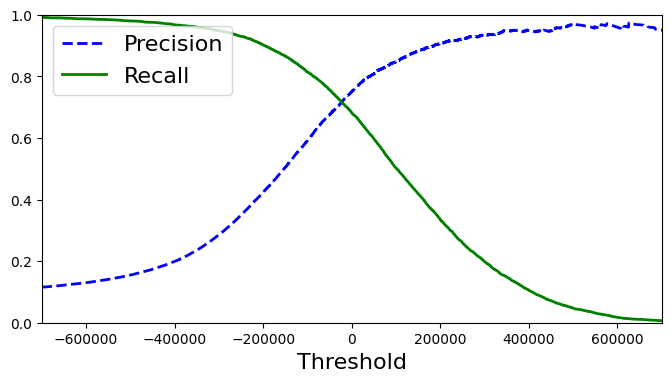

In [68]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# 自定义函数plot_precision_recall_vs_threshold，用于绘制精确度-召回率曲线
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    # 绘制精确度曲线，使用蓝色虚线表示
    # precisions[:-1]：去掉最后一个点，因为它可能是一个不稳定的值
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    
    # 绘制召回率曲线，使用绿色实线表示
    # recalls[:-1]：同样去掉最后一个点
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    
    # 设置x轴标签和字体大小
    plt.xlabel("Threshold", fontsize=16)
    
    # 添加图例，设置位置和字体大小
    plt.legend(loc="upper left", fontsize=16)
    
    # 设置y轴显示的范围在0到1之间
    plt.ylim([0, 1])

# 设置绘图的大小为8x4英寸
plt.figure(figsize=(8, 4))

# 调用自定义函数绘制精确度-召回率曲线
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

# 设置x轴显示的范围，根据实际的阈值范围进行调整
plt.xlim([-700000, 700000])

# 假设 savefig 是一个已经定义的函数，用于保存当前的图形
# 这里需要确保save_fig函数能够正确执行，并且有保存图形的权限
plt.savefig("images/precision_recall_vs_threshold_plot.png",bbox_inches='tight')

# 显示图形
plt.show()

In [69]:
# 使用cross_val_predict函数和decision_function方法获得的y_scores进行预测
# 阈值设为0，意味着任何决策函数分数大于或等于0的样本都将被预测为正类
# y_train_pred是早前使用cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)得到的预测结果
# 此处的比较操作(y_scores > 0)会为每个样本生成一个布尔数组，表示样本是否根据决策函数分数被预测为正类

# all()函数用于检查比较操作结果的布尔数组是否全为True
# 如果all()返回True，则表示使用阈值0得到的预测结果与y_train_pred完全一致
# 如果有任何不一致，则all()将返回False
is_perfect_match = (y_train_pred == (y_scores > 0)).all()
is_perfect_match

np.True_

In [70]:
# 使用决策函数的分数y_scores和阈值70000来生成预测
# y_scores是使用cross_val_predict方法和decision_function参数得到的决策函数分数
# 阈值70000是一个非常高的值，这意味着只有当模型对样本属于正类（例如数字5）的预测非常有信心时
# 才会将其分类为正类，这可能会显著降低召回率但提高精确度
# y_train_pred_90是一个布尔数组，表示模型预测的样本是否属于正类，基于阈值70000
y_train_pred_90 = (y_scores > 70000)

In [66]:
from sklearn.metrics import precision_score

# 使用precision_score函数计算在阈值70000下的模型预测精确度
# y_train_5是训练数据的实际标签的布尔数组，表示标签是否为5
# y_train_pred_90是在阈值70000下模型的预测结果布尔数组
# 由于70000是一个远高于y_scores可能值的阈值，y_train_pred_90可能很少有True的预测
# 这可能会导致一个非常高的精确度（如果至少有一个True预测），或者如果没有任何预测为True，则为0
# 这种阈值的选择可以帮助我们了解在非常保守的分类策略下模型的表现
precision_90 = precision_score(y_train_5, y_train_pred_90)
precision_90

np.float64(0.8366812227074236)

In [71]:
from sklearn.metrics import recall_score

# 使用recall_score函数计算在阈值70000下的模型预测召回率
# y_train_5是训练数据的实际标签的布尔数组，表示标签是否为5
# y_train_pred_90是在阈值70000下模型的预测结果布尔数组
# 由于70000是一个远高于y_scores可能值的阈值，y_train_pred_90可能很少有True的预测
# 这将导致召回率非常低，因为大多数实际为正类的样本可能没有被预测为正类
# 召回率衡量的是所有实际为正类的样本中，被模型正确预测为正类的比例
recall_90 = recall_score(y_train_5, y_train_pred_90)
recall_90

np.float64(0.560044272274488)

In [73]:
from sklearn.metrics import roc_curve

# 使用roc_curve函数计算接收者操作特征（ROC）曲线
# y_train_5是训练数据的实际标签的布尔数组，表示标签是否为5
# y_scores是使用cross_val_predict得到的决策函数分数
# 这个函数返回三个数组：
# fpr: 在不同的阈值下计算的假正例率（False Positive Rate）
# tpr: 在不同的阈值下计算的真正例率（True Positive Rate），也称为召回率
# thresholds: 与每个fpr和tpr值对应的阈值
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

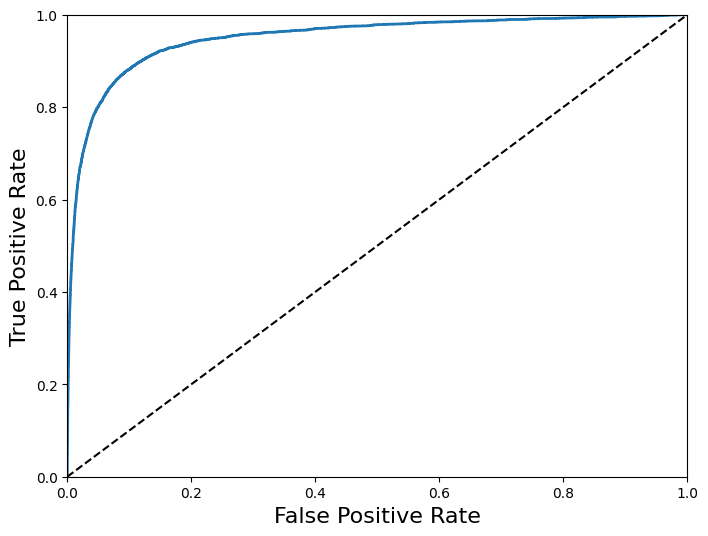

In [74]:
import matplotlib.pyplot as plt

# 自定义函数plot_roc_curve，用于绘制接收者操作特征（ROC）曲线
def plot_roc_curve(fpr, tpr, label=None):
    """
    绘制ROC曲线。
    
    参数:
    fpr : ndarray
        不同阈值下的假正例率。
    tpr : ndarray
        不同阈值下的真正例率。
    label : str, optional
        曲线的标签（图例），默认为None。
    """
    # 绘制ROC曲线，linewidth设置线宽，label设置图例
    plt.plot(fpr, tpr, linewidth=2, label=label)
    
    # 绘制参考线，即FPR和TPR都为0或1的线，表示没有分类能力的情况
    plt.plot([0, 1], [0, 1], 'k--')  # 'k'代表黑色，'--'代表虚线
    
    # 设置轴的范围在[0, 1]之间
    plt.axis([0, 1, 0, 1])
    
    # 设置x轴标签和字体大小
    plt.xlabel('False Positive Rate', fontsize=16)
    
    # 设置y轴标签和字体大小
    plt.ylabel('True Positive Rate', fontsize=16)

# 设置绘图的大小为8x6英寸
plt.figure(figsize=(8, 6))

# 调用自定义函数绘制ROC曲线，没有提供标签
plot_roc_curve(fpr, tpr)

# 假设 savefig 是一个已经定义的函数，用于保存当前的图形
# 这里需要确保 savefig 函数能够正确执行，并且有保存图形的权限
plt.savefig("images/roc_curve_plot.png",bbox_inches='tight')

# 显示图形
plt.show()

In [76]:
from sklearn.metrics import roc_auc_score

# 使用roc_auc_score函数计算ROC曲线下的面积（AUC）
# y_train_5是训练数据的实际标签的布尔数组，表示标签是否为5
# y_scores是使用cross_val_predict得到的决策函数分数
# 这个值提供了模型在二分类问题中整体性能的一个度量
# AUC值越高，表示模型区分两个类别的能力越强
roc_auc = roc_auc_score(y_train_5, y_scores)
roc_auc

np.float64(0.9501774882898226)

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

# 创建RandomForestClassifier实例，使用随机森林分类器
# n_estimators=10：设置森林中决策树的数量为10
# random_state=42：设置随机状态以确保模型的可重复性
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)

# 使用cross_val_predict函数和RandomForestClassifier实例
# X_train是训练数据的特征集
# y_train_5是表示训练数据是否为标签5的布尔数组
# cv=3：设置交叉验证的折数为3
# method="predict_proba"：指定使用predict_proba方法来获取每类的概率预测
# y_probas_forest是模型预测的概率结果，它是一个数组，包含了每个样本属于每个类别的概率
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [78]:
# 从随机森林分类器的预测概率y_probas_forest中提取正类（即标签为5）的概率
# 在sklearn中，predict_proba方法返回的是一个二维数组，其中每一列对应一个类别的概率
# 由于是二分类问题，我们通过索引1来获取正类的概率值
# y_scores_forest将是一个一维数组，包含了每个样本被预测为正类的概率
y_scores_forest = y_probas_forest[:, 1]  # score = probability of positive class

# 使用roc_curve函数计算随机森林分类器的ROC曲线
# y_train_5是训练数据的实际标签的布尔数组
# y_scores_forest是随机森林分类器预测的正类概率
# 这个函数返回三个数组：
# fpr_forest: 在不同阈值下计算的随机森林分类器的假正例率
# tpr_forest: 在不同阈值下计算的随机森林分类器的真正例率（召回率）
# thresholds_forest: 与每个fpr和tpr值对应的阈值
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

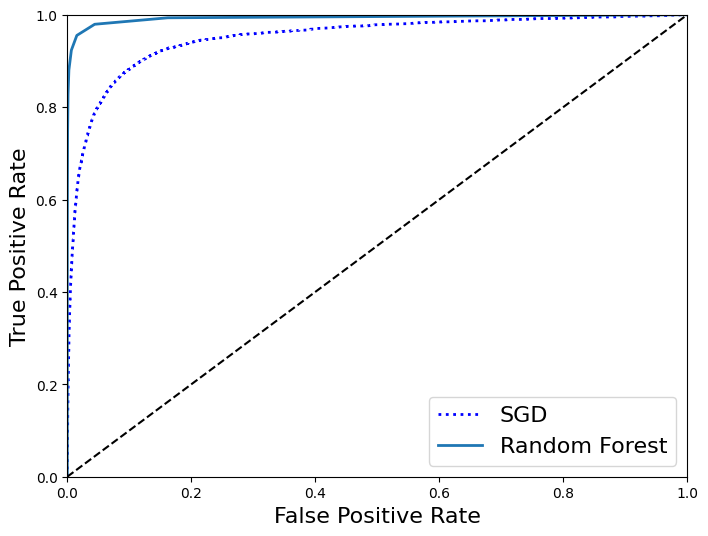

In [79]:
import matplotlib.pyplot as plt

# 设置绘图的大小为8x6英寸
plt.figure(figsize=(8, 6))

# 绘制SGD分类器的ROC曲线
# "b:" 表示使用蓝色虚线，linewidth=2 设置线宽为2
# label="SGD" 设置图例为"SGD"
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")

# 调用之前定义的plot_roc_curve函数绘制随机森林分类器的ROC曲线
# fpr_forest 和 tpr_forest 是随机森林分类器的假正例率和真正例率
# label="Random Forest" 设置图例为"Random Forest"
plot_roc_curve(fpr_forest, tpr_forest, label="Random Forest")

# 添加图例，loc="lower right" 设置图例位置在右下角，fontsize=16 设置字体大小为16
plt.legend(loc="lower right", fontsize=16)

# 假设 savefig 是一个已经定义的函数，用于保存当前的图形
# "roc_curve_comparison_plot" 是保存的文件名
plt.savefig("images/roc_curve_comparison_plot.png",bbox_inches='tight')

# 显示图形
plt.show()

In [80]:
from sklearn.metrics import roc_auc_score

# 使用roc_auc_score函数计算随机森林分类器的ROC曲线下的面积（AUC）
# y_train_5是训练数据的实际标签的布尔数组
# y_scores_forest是随机森林分类器预测的正类概率
# 这个值提供了模型在二分类问题中整体性能的一个度量
# AUC值越高，表示模型区分两个类别的能力越强
roc_auc_forest = roc_auc_score(y_train_5, y_scores_forest)
roc_auc_forest

np.float64(0.9931874532592573)

In [82]:
from sklearn.model_selection import cross_val_predict

# 使用cross_val_predict函数执行交叉验证预测
# forest_clf是之前创建并配置好的RandomForestClassifier模型实例
# X_train是训练数据的特征集
# y_train_5是布尔数组，表示训练数据标签是否为5
# cv=3：设置交叉验证的折数为3
# 这个函数将返回在每个折上使用训练数据预测的标签
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

# 导入precision_score函数用于计算精确度
from sklearn.metrics import precision_score

# 使用precision_score函数计算随机森林模型预测的精确度
# y_train_5是训练数据的实际标签的布尔数组
# y_train_pred_forest是随机森林模型的预测结果
# 精确度是在所有被模型预测为正类（即5）的样本中，实际为正类的比例
# 这个指标有助于评估模型在预测正类时的准确性
precision_forest = precision_score(y_train_5, y_train_pred_forest)
precision_forest

np.float64(0.985497692814766)

In [84]:
from sklearn.metrics import recall_score

# 使用recall_score函数计算随机森林模型预测的召回率
# y_train_5是训练数据的实际标签的布尔数组，表示标签是否为5
# y_train_pred_forest是使用cross_val_predict得到的随机森林模型的预测结果
# 召回率（recall）是在所有实际为正类（即5）的样本中，被模型正确预测为正类的比例
# 这个指标有助于评估模型捕捉所有正类样本的能力
recall_forest = recall_score(y_train_5, y_train_pred_forest)
recall_forest

np.float64(0.8273381294964028)

In [86]:
# 使用SGDClassifier模型的fit方法对训练数据进行训练
# X_train是训练数据的特征集，包含了60000个样本的特征
# y_train是训练数据的标签集，包含了对应的60000个样本的标签
# 调用fit方法将训练SGDClassifier模型，学习特征和标签之间的关系
sgd_clf.fit(X_train, y_train)

# 使用训练好的SGDClassifier模型的predict方法对单个样本some_digit进行预测
# some_digit是一个784维的NumPy数组，表示一个已经预处理的手写数字图像
# predict方法将返回模型预测的标签
# 由于some_digit只是一个单一样本，predict方法将返回一个包含预测标签的数组
predicted_label = sgd_clf.predict([some_digit])
predicted_label

D:\Program Files\Anaconda3\envs\MachineL_SKLearn_TensorF_Project\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([5], dtype=int8)

In [87]:
# 使用SGDClassifier模型的decision_function方法对单个样本some_digit进行评分
# some_digit是一个784维的NumPy数组，表示一个已经预处理的手写数字图像
# decision_function方法将返回模型对样本属于每个类别的原始分数
# 这些分数可以用于评估模型对样本分类的置信度
some_digit_scores = sgd_clf.decision_function([some_digit])

# 打印some_digit_scores，这将显示模型对some_digit图像属于每个类别的评分
# 注意，由于这是一个多分类问题，scores数组将包含10个元素，对应数字0到9的分数
some_digit_scores

array([[-249802.43533206, -483640.95704596, -156006.85951147,
        -195744.08672469, -465614.01876187,  143015.84803923,
        -538655.44089214, -323160.86696154, -690036.82487272,
        -555925.38879254]])

In [88]:
import numpy as np

# 使用numpy的argmax函数找到some_digit_scores中最大元素的索引
# some_digit_scores是模型对单个样本some_digit属于每个类别的评分数组
# np.argmax将返回scores数组中最大值的索引，这代表了模型最可能预测的类别
# 例如，如果返回值是2，这意味着模型预测some_digit最可能是数字3（索引从0开始）
predicted_digit_index = np.argmax(some_digit_scores)

# 打印predicted_digit_index，这将显示模型预测的数字类别
predicted_digit_index

np.int64(5)

In [89]:
# sgd_clf.classes_是SGDClassifier模型的一个属性
# 它包含了模型在训练后用于分类的所有类别的列表
# 对于MNIST数据集，这个列表将包含从0到9的整数，表示手写数字的10个类别
# 这个属性在模型经过fit方法训练后被设置，它反映了训练数据中出现的类别
# 可以通过打印sgd_clf.classes_来查看模型识别的类别
print(sgd_clf.classes_)

[0 1 2 3 4 5 6 7 8 9]


In [90]:
# sgd_clf.classes_属性包含了模型可以分类的所有类别的列表
# 通过访问特定的索引，比如[5]，我们可以获取到对应索引的类别
# 例如，在MNIST数据集中，索引5对应的类别是数字5
# 这个操作可以用来检查模型是否学习到了正确的类别，或者用于获取特定类别的标签
category_index_5 = sgd_clf.classes_[5]

# 打印category_index_5，这将显示索引5对应的类别标签
print(category_index_5)

5


In [94]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import SGDClassifier
import numpy as np

# 创建SGDClassifier实例，设置合适的参数
# max_iter=5：设置最大迭代次数为5
# tol=0：设置容忍度为0，意味着不会提前停止训练
# random_state=42：设置随机状态为42，以确保结果的可重复性
sgd_clf = SGDClassifier(max_iter=5, tol=0, random_state=42)

# 创建OneVsOneClassifier的实例，使用上面的SGDClassifier作为基分类器
ovo_clf = OneVsOneClassifier(estimator=sgd_clf)

# 使用fit方法训练OneVsOneClassifier
# X_train是训练数据的特征集，y_train是训练数据的标签集
# 这个fit方法将在内部为每一对类别训练一个SGDClassifier模型
ovo_clf.fit(X_train, y_train)

# 使用训练好的OneVsOneClassifier的predict方法对单个样本some_digit进行预测
# some_digit是一个784维的NumPy数组，表示一个已经预处理的手写数字图像
# predict方法将返回模型预测的标签
predicted_label_ovo = ovo_clf.predict([some_digit])
predicted_label_ovo

D:\Program Files\Anaconda3\envs\MachineL_SKLearn_TensorF_Project\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
D:\Program Files\Anaconda3\envs\MachineL_SKLearn_TensorF_Project\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
D:\Program Files\Anaconda3\envs\MachineL_SKLearn_TensorF_Project\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
D:\Program Files\Anaconda3\envs\MachineL_SKLearn_TensorF_Project\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iter

array([5], dtype=int8)

In [96]:
# OneVsOneClassifier在内部为每对类别组合训练一个SGDClassifier模型
# estimators_属性包含了所有这些训练好的SGDClassifier模型的列表
# len(ovo_clf.estimators_)将返回这些模型的数量

# 例如，在MNIST数据集中，因为有10个类别，将有10 * (10 - 1) / 2 = 45个SGDClassifier模型
# 这是因为每个类别将与其他9个类别进行比较，但比较是成对的，所以除以2
# 打印len(ovo_clf.estimators_)将显示训练好的SGDClassifier模型的总数
num_of_estimators = len(ovo_clf.estimators_)
num_of_estimators

45

In [97]:
# 使用之前创建的RandomForestClassifier实例forest_clf对训练数据进行训练
# X_train是训练数据的特征集，包含了60000个样本的特征
# y_train是训练数据的标签集，包含了对应的60000个样本的标签
# 调用fit方法将训练RandomForestClassifier模型，学习特征和标签之间的关系
forest_clf.fit(X_train, y_train)

# 使用训练好的RandomForestClassifier模型的predict方法对单个样本some_digit进行预测
# some_digit是一个784维的NumPy数组，表示一个已经预处理的手写数字图像
# predict方法将返回模型预测的标签
predicted_label_forest = forest_clf.predict([some_digit])
predicted_label_forest

array([5], dtype=int8)

In [99]:
# 使用训练好的RandomForestClassifier模型的predict_proba方法对单个样本some_digit进行概率预测
# some_digit是一个784维的NumPy数组，表示一个已经预处理的手写数字图像
# predict_proba方法将返回模型预测的每个类别的概率
# 这与predict方法不同，后者返回最可能的类别标签，而predict_proba提供所有类别的概率分布
probabilities = forest_clf.predict_proba([some_digit])
probabilities

array([[0.1, 0. , 0. , 0. , 0. , 0.9, 0. , 0. , 0. , 0. ]])

In [100]:
from sklearn.model_selection import cross_val_score

# 使用cross_val_score函数计算SGDClassifier模型在X_train数据集上的交叉验证准确率得分
# sgd_clf是已经初始化的SGDClassifier模型实例
# X_train是训练数据的特征集
# y_train是训练数据对应的标签集
# cv=3表示将数据集分割成3个部分进行交叉验证，即3折交叉验证
# scoring="accuracy"指定了评分标准为准确率，即正确预测的样本数占总样本数的比例
# 这个函数将返回一个数组，包含每次折的准确率得分，这些得分可以用于评估模型的稳定性和性能
scores = cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")
scores

D:\Program Files\Anaconda3\envs\MachineL_SKLearn_TensorF_Project\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
D:\Program Files\Anaconda3\envs\MachineL_SKLearn_TensorF_Project\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
D:\Program Files\Anaconda3\envs\MachineL_SKLearn_TensorF_Project\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.8735, 0.8689, 0.8776])

In [101]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import cross_val_score

# 创建StandardScaler实例，用于对特征进行标准化处理
# StandardScaler将数据转换为均值为0，标准差为1的标准正态分布
scaler = StandardScaler()

# 使用fit_transform方法对X_train进行标准化
# 首先将X_train的数据类型转换为np.float64，确保标准化处理的精度
# fit_transform方法先拟合X_train的数据分布，然后转换X_train的数据
# 结果存储在X_train_scaled，它是标准化后的X_train
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

# 使用cross_val_score函数计算SGDClassifier模型在标准化后的X_train数据集上的交叉验证准确率得分
# sgd_clf是已经初始化的SGDClassifier模型实例
# X_train_scaled是经过标准化处理的训练数据特征集
# y_train是训练数据对应的标签集
# cv=3表示将数据集分割成3个部分进行交叉验证，即3折交叉验证
# scoring="accuracy"指定了评分标准为准确率
# 这个函数将返回一个数组，包含每次折的准确率得分
scores = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")
scores

D:\Program Files\Anaconda3\envs\MachineL_SKLearn_TensorF_Project\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
D:\Program Files\Anaconda3\envs\MachineL_SKLearn_TensorF_Project\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
D:\Program Files\Anaconda3\envs\MachineL_SKLearn_TensorF_Project\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.9116, 0.9118, 0.9073])

In [102]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# 使用cross_val_predict函数在标准化后的X_train数据集上进行交叉验证预测
# sgd_clf是已经初始化的SGDClassifier模型实例
# X_train_scaled是经过标准化处理的训练数据特征集
# y_train是训练数据对应的标签集
# cv=3表示将数据集分割成3个部分进行交叉验证，即3折交叉验证
# 这个方法将返回在每个折上使用训练数据预测的标签
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

# 使用confusion_matrix函数计算y_train（实际标签）和y_train_pred（预测标签）之间的混淆矩阵
# 混淆矩阵是一个表格，用于描述分类模型的性能
# 它显示了每个类别的真实和预测标签的分布情况
# 对角线上的值表示正确分类的数量，而非对角线上的值表示分类错误的数量
conf_mx = confusion_matrix(y_train, y_train_pred)

# 打印conf_mx，这将显示模型性能的混淆矩阵
print(conf_mx)

D:\Program Files\Anaconda3\envs\MachineL_SKLearn_TensorF_Project\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
D:\Program Files\Anaconda3\envs\MachineL_SKLearn_TensorF_Project\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[[5738    2   23    9   10   43   42    9   41    6]
 [   1 6480   43   24    7   38    8   12  117   12]
 [  56   34 5355   85   91   18   93   52  157   17]
 [  53   45  144 5320    4  231   40   54  143   97]
 [  20   27   35    9 5380    8   50   27   87  199]
 [  70   35   33  193   70 4570  110   30  205  105]
 [  34   20   37    2   49   81 5642    3   50    0]
 [  22   18   69   27   51   11    6 5772   22  267]
 [  51  153   74  149   16  148   55   25 5047  133]
 [  45   35   24   84  159   30    3  178   81 5310]]


D:\Program Files\Anaconda3\envs\MachineL_SKLearn_TensorF_Project\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [103]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(matrix):
    """
    绘制混淆矩阵的函数，使用颜色和颜色条增强可视化效果。
    
    参数:
    matrix : ndarray
        混淆矩阵，一个二维的NumPy数组，表示模型预测的性能。
        
    该函数创建一个图形，显示混淆矩阵，并使用颜色条来表示不同分类结果的密度或数量。
    """
    # 设置图形的大小为8x8英寸
    fig = plt.figure(figsize=(8,8))
    
    # 在图形中添加一个子图，111表示1x1网格中的单一子图
    ax = fig.add_subplot(111)
    
    # 使用matshow方法显示混淆矩阵，该方法会以矩阵形式显示数据，并使用颜色映射
    cax = ax.matshow(matrix)
    
    # 添加颜色条到图形中，cax是matshow返回的颜色映射轴对象
    # 颜色条提供了一个参考，用于解释矩阵中不同颜色的数值大小
    fig.colorbar(cax)

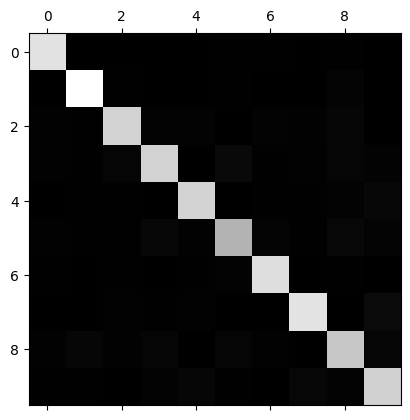

In [104]:
import matplotlib.pyplot as plt

# 使用plt.matshow方法显示混淆矩阵conf_mx
# cmap=plt.cm.gray指定了使用灰度颜色映射来显示矩阵
# 这将创建一个显示混淆矩阵的图形，颜色的深浅代表不同的数值大小
plt.matshow(conf_mx, cmap=plt.cm.gray)

# 假设 savefig 是一个已经定义的函数，用于保存当前的图形
# "confusion_matrix_plot"是指定的保存文件名
plt.savefig("images/confusion_matrix_plot.png",bbox_inches='tight')

# 显示图形，使用plt.show()可以在绘图窗口中查看图形
# 这允许用户在屏幕上查看混淆矩阵的可视化效果
plt.show()

In [105]:
import numpy as np

# 计算混淆矩阵conf_mx的每一行的总和
# axis=1指定了沿着水平方向（即矩阵的行）进行求和
# keepdims=True表示保持维度，这样row_sums的形状将与conf_mx保持一致，除了求和的维度
row_sums = conf_mx.sum(axis=1, keepdims=True)

# 将混淆矩阵conf_mx通过行总和row_sums进行归一化
# 归一化后的矩阵norm_conf_mx中的每个元素代表对应类别的真实样本在该类别中所占的比例
# 这为我们提供了一个概率分布，其中每一行的和为1，表示对每个类别的预测分布
norm_conf_mx = conf_mx / row_sums

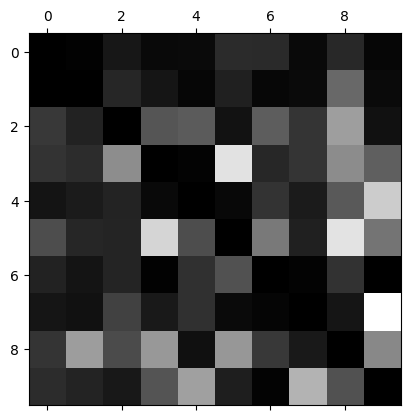

In [106]:
import numpy as np
import matplotlib.pyplot as plt

# 将归一化混淆矩阵norm_conf_mx的对角线元素填充为0
# 对角线元素代表正确分类的比例，这里将其设置为0是为了更清楚地显示错误分类的情况
np.fill_diagonal(norm_conf_mx, 0)

# 使用plt.matshow方法显示归一化混淆矩阵norm_conf_mx，突出显示错误分类
# cmap=plt.cm.gray指定了使用灰度颜色映射来显示矩阵
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

# 假设 savefig 是一个已经定义的函数，用于保存当前的图形
# "confusion_matrix_errors_plot"是指定的保存文件名
plt.savefig("images/confusion_matrix_errors_plot.png",bbox_inches='tight')

# 显示图形，使用plt.show()可以在绘图窗口中查看图形
# 这允许用户在屏幕上查看归一化混淆矩阵的可视化效果，特别是错误分类的部分
plt.show()

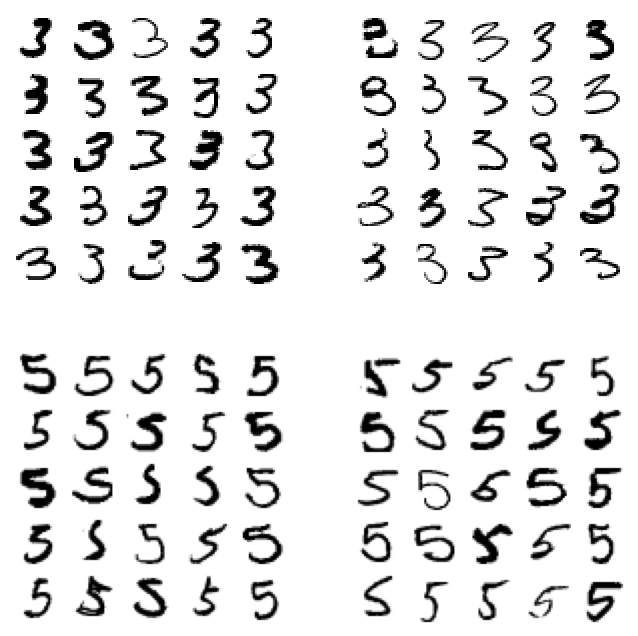

In [107]:
import numpy as np
import matplotlib.pyplot as plt

# 定义两个类别的标签值，例如数字3和数字5
cl_a, cl_b = 3, 5

# 使用布尔索引选择X_train中真实标签和预测标签都为cl_a的样本
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]

# 使用布尔索引选择X_train中真实标签为cl_a，但预测标签为cl_b的样本
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]

# 使用布尔索引选择X_train中真实标签为cl_b，但预测标签为cl_a的样本
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]

# 使用布尔索引选择X_train中真实标签和预测标签都为cl_b的样本
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

# 设置图形的大小为8x8英寸
plt.figure(figsize=(8,8))

# 绘制四个子图，分别展示X_aa, X_ab, X_ba, X_bb中的样本图像
# 每个子图显示25个样本，每行显示5个图像
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)

# 假设 savefig 是一个已经定义的函数，用于保存当前的图形
# "error_analysis_digits_plot"是指定的保存文件名
plt.savefig("images/error_analysis_digits_plot.png",bbox_inches='tight')

# 显示图形，使用plt.show()可以在绘图窗口中查看图形
# 这允许用户在屏幕上查看不同分类情况下的样本图像
plt.show()

In [108]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# 将y_train转换为一个布尔数组，其中的元素表示原始标签是否大于或等于7
y_train_large = (y_train >= 7)

# 将y_train转换为一个布尔数组，其中的元素表示原始标签是否为奇数
y_train_odd = (y_train % 2 == 1)

# 使用np.c_将y_train_large和y_train_odd两个布尔数组按列合并
# 这将创建一个新的多标签数组y_multilabel，其中每行代表一个样本的多个标签
y_multilabel = np.c_[y_train_large, y_train_odd]

# 创建KNeighborsClassifier的实例，这是一个k近邻分类器
knn_clf = KNeighborsClassifier()

# 使用fit方法训练knn_clf模型
# X_train是训练数据的特征集，y_multilabel是对应的多标签数组
# 这个fit方法将训练knn_clf模型，使其能够根据X_train的特征预测y_multilabel中的标签
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [110]:
# 使用训练好的KNeighborsClassifier模型knn_clf对单个样本some_digit进行预测
# some_digit是一个784维的NumPy数组，表示一个已经预处理的手写数字图像
# predict方法将根据knn_clf模型的学习和some_digit的特征，预测其对应的标签
# 对于多标签分类问题，预测结果将是一个布尔数组，表示样本对于每个标签的隶属情况
predicted_labels = knn_clf.predict([some_digit])
predicted_labels

array([[False,  True]])

In [113]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score

# 使用cross_val_predict函数在X_train数据集上使用knn_clf模型进行交叉验证预测
# knn_clf是已经初始化的KNeighborsClassifier模型实例
# X_train是训练数据的特征集
# y_multilabel是对应的多标签数组，包含了样本的多个标签
# cv=3表示将数据集分割成3个部分进行交叉验证，即3折交叉验证
# n_jobs=-1表示使用所有可用的CPU核心来加速交叉验证过程
# 这个方法将返回在每个折上使用训练数据预测的标签
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)

# 使用f1_score函数计算knn_clf模型在多标签分类问题上的F1分数
# y_multilabel是真实标签数组，y_train_knn_pred是预测得到的标签数组
# average="macro"表示计算宏平均F1分数，即每个标签的F1分数的简单平均
# 宏平均对所有类别的F1分数给予相同权重，不考虑类别样本数量的不平衡
f1_macro = f1_score(y_multilabel, y_train_knn_pred, average="macro")
f1_macro

np.float64(0.9769702839959413)

In [114]:
import numpy as np

# 创建一个与X_train相同形状的数组，其中填充0到100之间的随机整数
# 这将作为噪声添加到原始的X_train数据中
noise = np.random.randint(0, 100, (len(X_train), 784))

# 将噪声添加到X_train的原始数据中，形成新的训练数据集X_train_mod
X_train_mod = X_train + noise

# 用相同的方法创建噪声并添加到测试数据集X_test中，形成X_test_mod
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise

# 下面的两行代码是错误的，因为它们将训练和测试标签分别赋值为X_train和X_test的数据，
# 这不符合逻辑，因为标签应该是原始数据集的真实标签，而不是特征数据。
# 这可能是一个错误，通常我们不会这样修改标签。
y_train_mod = X_train  # 错误：标签不应该被修改为特征数据
y_test_mod = X_test     # 错误：标签不应该被修改为特征数据

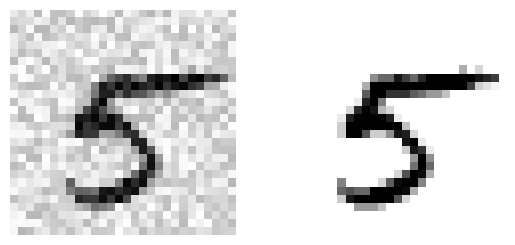

In [115]:
import matplotlib.pyplot as plt

# 选择一个特定的索引来获取X_test_mod和y_test_mod中的图像
# 这个索引用于获取两个数组中相应位置的样本
some_index = 5500

# 设置图形为1行2列的子图布局，并激活第1个子图（从0开始计数）
plt.subplot(121); 
# 调用plot_digit函数绘制X_test_mod中索引为some_index的图像
# 这应该是一个添加了噪声的手写数字图像
plot_digit(X_test_mod[some_index])

# 激活第2个子图（索引为1）
plt.subplot(122); 
# 调用plot_digit函数绘制y_test_mod中索引为some_index的图像
# 根据之前的代码，y_test_mod错误地被赋值为X_test，所以这将不是一个标签图像
# 正确的做法应该是绘制原始的y_test中的真实标签图像
plot_digit(y_test_mod[some_index])
 
# 假设 savefig 是一个已经定义的函数，用于保存当前的图形
# "noisy_digit_example_plot"是指定的保存文件名
plt.savefig("images/noisy_digit_example_plot.png",bbox_inches='tight')

# 显示图形，使用plt.show()可以在绘图窗口中查看图形
# 这允许用户在屏幕上查看添加了噪声的图像和对应的真实标签图像
plt.show()

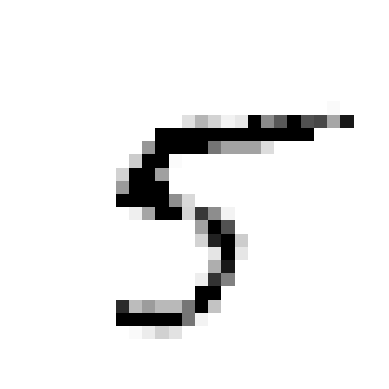

In [116]:
# 使用修改后的训练数据集X_train_mod和错误赋值的标签集y_train_mod训练knn_clf模型
# 这里使用fit方法更新knn_clf模型，使其学习带有噪声的数据集特征
knn_clf.fit(X_train_mod, y_train_mod)

# 使用训练好的knn_clf模型对单个样本X_test_mod[some_index]进行预测
# predict方法将返回模型预测的最可能的类别
# 然而，由于KNeighborsClassifier是用于分类的，它实际上不直接输出一个图像
# 这里可能的意图是使用knn_clf来估计噪声并尝试“清洁”图像
# 但正确的做法是使用去噪技术或获取一个干净的图像数据集
clean_digit = knn_clf.predict([X_test_mod[some_index]])

# 假设plot_digit函数用于绘制单个图像，这里将绘制knn_clf预测的“清洁”后的图像
# 然而，由于predict返回的是类别标签，而不是图像，这个调用可能是错误的
# 如果clean_digit确实是一个图像，那么可以绘制它
plot_digit(clean_digit)

# 假设 savefig 是一个已经定义的函数，用于保存当前的图形
# "cleaned_digit_example_plot"是指定的保存文件名
# 这个函数将保存绘制的“清洁”后的图像
plt.savefig("images/cleaned_digit_example_plot.png",bbox_inches='tight')

In [117]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_predict

# 导入DummyClassifier类，这是一个虚拟的分类器，用于作为基线模型或测试
dmy_clf = DummyClassifier()

# 使用cross_val_predict函数和DummyClassifier实例dmy_clf进行交叉验证预测
# X_train是训练数据的特征集
# y_train_5是布尔数组，表示训练数据标签是否为5
# cv=3表示将数据集分割成3个部分进行交叉验证，即3折交叉验证
# method="predict_proba"指定使用predict_proba方法来获取每类的概率预测
# y_probas_dmy是模型预测的概率结果，它是一个数组，包含了每个样本属于每个类别的概率
y_probas_dmy = cross_val_predict(dmy_clf, X_train, y_train_5, cv=3, method="predict_proba")

# 从DummyClassifier的预测概率y_probas_dmy中提取正类（即标签为5）的概率
# y_probas_dmy[:, 1]通过列索引1获取概率数组中对应于正类的概率值
# 这将是一个一维数组，包含了每个样本被预测为正类的概率
y_scores_dmy = y_probas_dmy[:, 1]

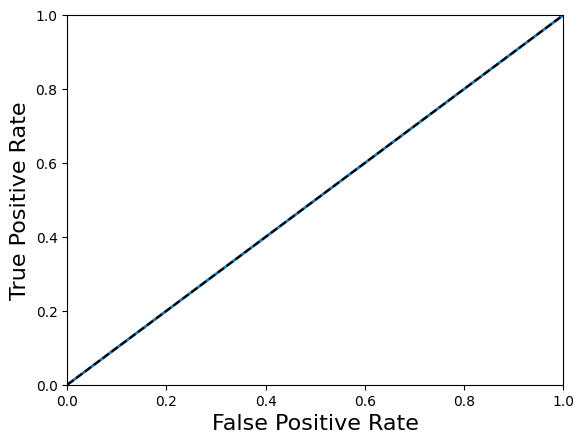

In [118]:
from sklearn.metrics import roc_curve

# 使用roc_curve函数计算DummyClassifier预测的ROC曲线的相关值
# y_train_5是训练数据的实际标签的布尔数组，表示标签是否为5
# y_scores_dmy是在上一步中获取的DummyClassifier预测的正类概率
# 这个函数返回三个数组：
# fprr: 不同阈值下的假正例率（False Positive Rate）
# tprr: 不同阈值下的真正例率（True Positive Rate），也称为召回率
# thresholdsr: 与每个假正例率和真正例率值对应的阈值
fprr, tprr, thresholdsr = roc_curve(y_train_5, y_scores_dmy)

# 假设plot_roc_curve是一个已经定义的函数，用于绘制ROC曲线
# 这里调用该函数绘制DummyClassifier的ROC曲线
# fprr和tprr是从roc_curve函数获取的假正例率和真正例率
# 这个曲线将展示DummyClassifier在不同阈值下的性能
plot_roc_curve(fprr, tprr)

In [119]:
from sklearn.neighbors import KNeighborsClassifier

# 创建KNeighborsClassifier实例，这是一个基于邻近距离的分类器
# n_jobs=-1表示使用所有可用的CPU核心进行训练，以加速计算过程
# weights='distance'表示在投票时，近的邻居的权重会更大，根据它们与样本的距离进行加权
# n_neighbors=4表示在进行决策时考虑最近的4个邻居
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)

# 使用fit方法训练knn_clf模型
# X_train是训练数据的特征集，包含了60000个样本的特征
# y_train是训练数据的标签集，包含了对应的60000个样本的标签
# 调用fit方法将训练KNeighborsClassifier模型，使其能够根据X_train的特征预测y_train中的标签
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=4, weights='distance')

In [120]:
# 使用训练好的KNeighborsClassifier模型knn_clf对测试数据集X_test进行预测
# X_test是测试数据的特征集，包含了一定数量的手写数字图像的特征
# predict方法将根据knn_clf模型的学习和X_test的特征，预测每个样本对应的标签
# 返回的y_knn_pred是模型预测的标签数组，包含了测试数据集中每个样本的预测结果
y_knn_pred = knn_clf.predict(X_test)

In [121]:
from sklearn.metrics import accuracy_score

# 使用accuracy_score函数计算KNeighborsClassifier模型在测试数据集上的准确率
# y_test是测试数据的真实标签
# y_knn_pred是KNeighborsClassifier模型预测的标签
# 这个函数将比较y_test和y_knn_pred，并计算两者一致的比例，即准确率
# 准确率是评估分类器性能的一个重要指标，表示模型预测正确的样本数占总样本数的比例
accuracy = accuracy_score(y_test, y_knn_pred)
accuracy

0.9714

C:\Users\xiankui.qin\AppData\Local\Temp\ipykernel_48904\3895086549.py:29: DeprecationWarning: Please import `shift` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  return ndii.shift(digit_array.reshape(28, 28), [dy, dx], cval=new).reshape(784)


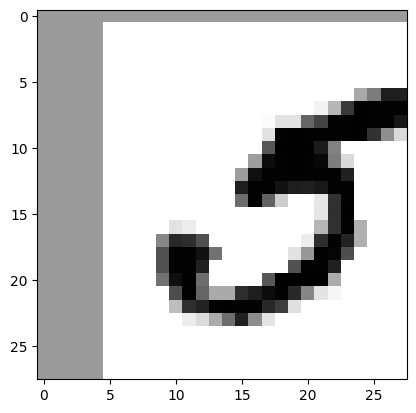

In [126]:
from scipy.ndimage import interpolation as ndii


# 导入scipy.ndimage.interpolation.shift函数，用于对数组进行平移操作
# 导入sklearn.metrics.plot_digit函数，用于绘制单个图像

def shift_digit(digit_array, dx, dy, new=0):
    """
    平移手写数字图像的函数。
    
    参数:
    digit_array : ndarray
        原始的784维手写数字图像数组。
    dx : int
        图像沿x轴（水平方向）的平移距离。
    dy : int
        图像沿y轴（垂直方向）的平移距离。
    new : int, optional (default: 0)
        平移后新创建像素的填充值。
        
    返回:
    ndarray
        平移后的28x28图像数组。
    """
    # 使用reshape将一维数组转换为28x28的二维数组
    # 使用shift函数对图像进行平移，指定平移的方向和距离
    # cval指定了平移后边界外的像素值
    # 最后，再次使用reshape将数组转换回一维数组
    return ndii.shift(digit_array.reshape(28, 28), [dy, dx], cval=new).reshape(784)

# 使用shift_digit函数平移some_digit图像
# some_digit是一个784维的NumPy数组，代表一个手写数字图像
# dx和dy参数指定了平移的距离，这里是向右1个像素，向下5个像素
# new参数指定了平移后新创建像素的值，这里设置为100
shifted_digit = shift_digit(some_digit, 5, 1, new=100)

# 使用plot_digit函数绘制平移后的图像
# 这将展示平移操作的效果
plt.imshow(shifted_digit.reshape((28, 28)), cmap='gray_r')

In [127]:
import numpy as np

# 初始化X_train_expanded和y_train_expanded，将原始的X_train和y_train作为第一个元素
X_train_expanded = [X_train]
y_train_expanded = [y_train]

# 定义四个平移方向，分别向右、向左、向下和向上
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    # 使用np.apply_along_axis函数对X_train中的每个图像应用shift_digit函数
    # 这里，axis=1表示沿着每个图像的第二个维度（即784维中的第二个轴）
    # arr=X_train是输入的数组，dx和dy定义了平移的方向和距离
    # shift_digit函数将被应用于X_train的每一行（即每个图像）
    shifted_images = np.apply_along_axis(shift_digit, 1, X_train, dx=dx, dy=dy)
    
    # 将平移后的图像添加到X_train_expanded列表中
    X_train_expanded.append(shifted_images)
    
    # 将原始的y_train标签复制并添加到y_train_expanded列表中
    # 假设平移后的图像保持相同的标签
    y_train_expanded.append(y_train)

# 使用np.concatenate函数将X_train_expanded和y_train_expanded列表中的所有数组连接起来
# 这将创建一个新的扩展的训练数据集，包含原始图像和它们的平移版本
X_train_expanded = np.concatenate(X_train_expanded)
y_train_expanded = np.concatenate(y_train_expanded)

# 打印X_train_expanded和y_train_expanded的形状
# 这将告诉我们扩展后的数据集中有多少图像，以及每个图像有多少特征
print(X_train_expanded.shape, y_train_expanded.shape)

C:\Users\xiankui.qin\AppData\Local\Temp\ipykernel_48904\3895086549.py:29: DeprecationWarning: Please import `shift` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  return ndii.shift(digit_array.reshape(28, 28), [dy, dx], cval=new).reshape(784)


(300000, 784) (300000,)


In [128]:
# 使用KNeighborsClassifier模型knn_clf对扩展后的训练数据集X_train_expanded进行训练
# X_train_expanded是扩展后的特征集，包含了原始图像和它们的平移版本
# y_train_expanded是对应的标签集，假设平移后的图像保持相同的标签
# fit方法将训练KNeighborsClassifier模型，使其能够根据X_train_expanded的特征预测标签
knn_clf.fit(X_train_expanded, y_train_expanded)

KNeighborsClassifier(n_jobs=-1, n_neighbors=4, weights='distance')

In [129]:
# 使用训练好的KNeighborsClassifier模型knn_clf对测试数据集X_test进行预测
# X_test是测试数据的特征集，包含了一定数量的手写数字图像的特征
# predict方法将根据knn_clf模型的学习和X_test的特征，预测每个样本对应的标签
# 返回的y_knn_expanded_pred是模型预测的标签数组，包含了测试数据集中每个样本的预测结果
y_knn_expanded_pred = knn_clf.predict(X_test)

# 导入accuracy_score函数，用于计算模型预测的准确率
from sklearn.metrics import accuracy_score

# 使用accuracy_score函数计算knn_clf模型在测试数据集上的准确率
# y_test是测试数据的真实标签
# y_knn_expanded_pred是KNeighborsClassifier模型预测的标签
# 这个函数将比较y_test和y_knn_expanded_pred，并计算两者一致的比例，即准确率
# 准确率是评估分类器性能的一个重要指标，表示模型预测正确的样本数占总样本数的比例
test_accuracy = accuracy_score(y_test, y_knn_expanded_pred)
test_accuracy

0.9763

In [131]:
# 从测试数据集X_test中选择索引为2589的图像
# 这个图像将被用于进一步的分析或展示
ambiguous_digit = X_test[2589]

# 使用训练好的KNeighborsClassifier模型knn_clf预测ambiguous_digit的概率
# predict_proba方法将返回一个数组，其中包含ambiguous_digit属于每个可能类别的概率
# 这可以提供模型预测的置信度，帮助我们了解模型对该样本分类的确定性
probabilities = knn_clf.predict_proba([ambiguous_digit])
probabilities

array([[0.       , 0.       , 0.5053645, 0.       , 0.       , 0.       ,
        0.       , 0.4946355, 0.       , 0.       ]])

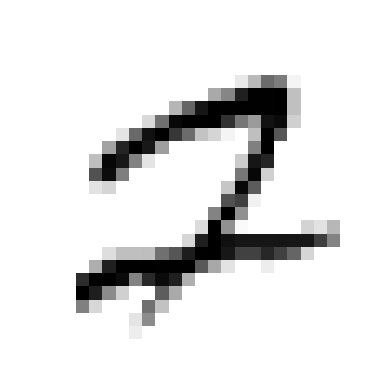

In [132]:
# 假设plot_digit是一个已经定义的函数，用于绘制单个手写数字图像
# 这里，我们使用plot_digit函数绘制索引为2589的测试图像ambiguous_digit
# 这个函数将展示图像的像素数据，允许我们直观地查看模型正在尝试分类的图像
# 这可以用于分析模型预测的准确性或在某些情况下的不确定性
plot_digit(ambiguous_digit)